In [1]:
from hossam import *
from pandas import concat
from pycaret.regression import *

In [2]:
origin = load_data("restaurant_sales_preprocessed")
origin.set_index("date", inplace=True)
origin["holiday"] = origin["holiday"].astype("category")
origin["weekend"] = origin["weekend"].astype("category")
origin.info()

어느 식당의 1년간 일별 매출을 기록한 데이터의 전처리 완료 버전(명목형이 이진변수만 있으므로 더미변수는 처리하지 않음)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2024-01-01 to 2024-12-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sales           353 non-null    float64 
 1   visitors        353 non-null    int64   
 2   avg_price       353 non-null    int64   
 3   marketing_cost  353 non-null    float64 
 4   delivery_ratio  353 non-null    float64 
 5   rain_mm         353 non-null    float64 
 6   temperature     353 non-null    float64 
 7   holiday         353 non-null    category
 8   weekend         353 non-null    category
dtypes: category(2), float64(5), int64(2)
memory usage: 23.0 KB


In [3]:
s = RegressionExperiment()

s.setup(
    # ----------------------------
    # 기본 설정 (필수 지정)
    # ----------------------------
    # 데이터셋 지정
    data=origin,
    # 예측 목표 변수 지정
    target="sales",
    # 랜덤 시드 고정
    session_id=52,
    # 훈련 데이터 비율 (기본값=0.7)
    train_size=0.75,
    # 교차검증 폴드 수 지정
    fold=5,
    # 처리과정 출력 안함 (기본값 True, False 권장. 출력 과정이 다소 길어질 수 있음)
    verbose=False,
    # GPU 사용 여부 지정 (기본값 False) - True로 설정하면 컴퓨터 환경에 따라 지원 안될 경우 에러 발생
    use_gpu=False,
    # ----------------------------
    # 전처리 설정 (1)
    # ----------------------------
    # 범주형 변수 지정(기본값 None)
    categorical_features=["weekend", "holiday"],
    # 생략할 변수 지정(기본값 None)
    ignore_features=[],
    # 데이터 정규화/표준화 활성화(기본값 False)
    normalize=True,
    # 데이터 정규화/표준화 방법 선택 (zscore가 StandardScaler와 동일)
    # 'minmax', 'maxabs', 'robust', 'zscore'
    normalize_method="zscore",
    # ----------------------------
    # 전처리 설정 (2) - 아래 기능은 사용하지 말고, 데이터 별도의 전처리 단계를 거치는 것을 권장
    # ----------------------------
    # 이상치 제거 (기본값 False, IQR 범위 밖의 값을 삭제함)
    remove_outliers=False,
    # 이상치 제거 임계값 (기본값 0.05, 상하위 몇 %를 이상치로 간주할지 지정)
    outliers_threshold=0.05,
    # 종속변수 변환 (기본값 False)
    transform_target=False,
    # 변수 선택 (기본값 False)
    feature_selection=False,
)

In [4]:
s.pull()

,Description,Value
0,Session id,52
1,Target,sales
2,Target type,Regression
3,Original data shape,"(353, 9)"
4,Transformed data shape,"(353, 9)"
5,Transformed train set shape,"(264, 9)"
6,Transformed test set shape,"(89, 9)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


In [5]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [6]:
best5models = s.compare_models(sort="RMSE", n_select=5, fold=5)
best5models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.1654,0.0427,0.2056,0.6959,0.0119,0.0101,0.0080
ridge,Ridge Regression,0.1657,0.0428,0.2060,0.6948,0.0119,0.0101,0.1940
lr,Linear Regression,0.1658,0.0429,0.2061,0.6943,0.0119,0.0101,0.4880
lar,Least Angle Regression,0.1658,0.0429,0.2061,0.6943,0.0119,0.0101,0.0080
huber,Huber Regressor,0.1653,0.0429,0.2062,0.6938,0.0119,0.0101,0.0080
rf,Random Forest Regressor,0.1751,0.0494,0.2214,0.6438,0.0128,0.0107,0.0220
ada,AdaBoost Regressor,0.1758,0.0500,0.2227,0.6430,0.0128,0.0108,0.0140
et,Extra Trees Regressor,0.1783,0.0502,0.2231,0.6391,0.0129,0.0109,0.0180
lightgbm,Light Gradient Boosting Machine,0.1799,0.0517,0.2256,0.6329,0.0130,0.0110,0.0680
catboost,CatBoost Regressor,0.1851,0.0534,0.2299,0.6235,0.0132,0.0113,0.1320


[BayesianRidge(),
 Ridge(random_state=52),
 LinearRegression(n_jobs=-1),
 Lars(random_state=52),
 HuberRegressor()]

In [7]:
best5models = s.compare_models(
    include=[
        "lr",
        "ridge",
        "lasso",
        "en",
        "knn",
        "svm",
        "dt",
        "xgboost",
        "lightgbm",
        "catboost",
    ],
    sort="RMSE",
    n_select=5,
    fold=5,
)
best5models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.1657,0.0428,0.2060,0.6948,0.0119,0.0101,0.0080
lr,Linear Regression,0.1658,0.0429,0.2061,0.6943,0.0119,0.0101,0.0080
lightgbm,Light Gradient Boosting Machine,0.1799,0.0517,0.2256,0.6329,0.0130,0.0110,0.0700
svm,Support Vector Regression,0.1811,0.0526,0.2284,0.6323,0.0131,0.0111,0.0080
catboost,CatBoost Regressor,0.1851,0.0534,0.2299,0.6235,0.0132,0.0113,0.1160
xgboost,Extreme Gradient Boosting,0.1884,0.0552,0.2344,0.6114,0.0135,0.0115,0.0120
knn,K Neighbors Regressor,0.1878,0.0558,0.2358,0.6041,0.0136,0.0115,0.0140
dt,Decision Tree Regressor,0.2458,0.0994,0.3135,0.2846,0.0181,0.0150,0.0080
lasso,Lasso Regression,0.3208,0.1470,0.3824,-0.0212,0.0220,0.0196,0.0080
en,Elastic Net,0.3208,0.1470,0.3824,-0.0212,0.0220,0.0196,0.0080


[Ridge(random_state=52),
 LinearRegression(n_jobs=-1),
 LGBMRegressor(n_jobs=-1, random_state=52),
 SVR(),

In [8]:
blended = s.blend_models(estimator_list=best5models, fold=5)
blended

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1922,0.0578,0.2404,0.6162,0.0138,0.0117
1,0.1795,0.0475,0.2180,0.7314,0.0126,0.0110
2,0.1467,0.0330,0.1817,0.7925,0.0106,0.0090
3,0.1535,0.0364,0.1908,0.6840,0.0110,0.0094
4,0.1757,0.0494,0.2223,0.5888,0.0128,0.0107
Mean,0.1695,0.0448,0.2106,0.6826,0.0121,0.0104
Std,0.0169,0.0090,0.0215,0.0744,0.0012,0.0010


VotingRegressor(estimators=[('Ridge Regression', Ridge(random_state=52)),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=52)),
                            ('Support Vector Regression', SVR()),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x331935b10>)],
                n_jobs=-1)

In [9]:
%%time

tuned = s.tune_model(
    estimator=blended,
    optimize="RMSE",
    n_iter=30,
    fold=5,
    choose_better=True,
    verbose=False,
    early_stopping=True,
    
    # 하이퍼파라미터 탐색 방법(grid=전체탐색, random=무작위탐색)
    search_algorithm="random",
    
    # 직접 하이퍼파라미터 범위 구성하기 (생략할 경우 자동 구성함)
    custom_grid={
        "Ridge Regression__alpha": [0.01, 0.1, 1, 10, 100],
        
        "Light Gradient Boosting Machine__n_estimators": [200],  # [100, 300, 500],
        "Light Gradient Boosting Machine__learning_rate": [0.05, 0.1],  # [0.01, 0.05, 0.1],
        "Light Gradient Boosting Machine__num_leaves": [31, 63],  # [15, 31, 63],
        "Light Gradient Boosting Machine__max_depth": [-1, 5],  # [-1, 3, 5, 7],
        "Light Gradient Boosting Machine__min_child_samples": [20, 50],  # [10, 20, 50],
        "Light Gradient Boosting Machine__subsample": [0.8],  # [0.6, 0.8, 1.0],
        "Light Gradient Boosting Machine__reg_alpha": [0, 0.1, 1],
        "Light Gradient Boosting Machine__reg_lambda": [0, 1, 5],
        
        "Support Vector Regression__kernel": ["rbf"],  # 수업·실습 기본은 rbf 고정
        "Support Vector Regression__C": [0.1, 1, 10, 100],
        "Support Vector Regression__epsilon": [0.01, 0.05, 0.1, 0.2],
        "Support Vector Regression__gamma": ["scale", "auto", 0.01, 0.1, 1],
        
        "CatBoost Regressor__iterations": [300, 500],
        "CatBoost Regressor__learning_rate": [0.01, 0.03, 0.1],
        "CatBoost Regressor__depth": [4, 6, 8],
        "CatBoost Regressor__l2_leaf_reg": [1, 3, 5],
        "CatBoost Regressor__subsample": [0.8, 1.0],
    }
)

tuned

CPU times: user 540 ms, sys: 28.2 ms, total: 568 ms
Wall time: 17.7 s


VotingRegressor(estimators=[('Ridge Regression',
                             Ridge(alpha=0.01, random_state=52)),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(max_depth=5, min_child_samples=50,
                                           n_estimators=200, n_jobs=-1,
                                           random_state=52, reg_alpha=0.1,
                                           reg_lambda=0, subsample=0.8)),
                            ('Support Vector Regression', SVR(C=1)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x3318f29d0>)],
                n_jobs=-1, weights=[1, 1, 1, 1, 1])

In [10]:
tuned.get_params()

{'estimators': [('Ridge Regression', Ridge(alpha=0.01, random_state=52)),
  ('Linear Regression', LinearRegression(n_jobs=-1)),
  ('Light Gradient Boosting Machine',
   LGBMRegressor(max_depth=5, min_child_samples=50, n_estimators=200, n_jobs=-1,
                 random_state=52, reg_alpha=0.1, reg_lambda=0, subsample=0.8)),
  ('Support Vector Regression', SVR(C=1)),
  ('CatBoost Regressor', <catboost.core.CatBoostRegressor at 0x3318f29d0>)],
 'n_jobs': -1,
 'verbose': False,
 'weights': [1, 1, 1, 1, 1],
 'Ridge Regression': Ridge(alpha=0.01, random_state=52),
 'Linear Regression': LinearRegression(n_jobs=-1),
 'Light Gradient Boosting Machine': LGBMRegressor(max_depth=5, min_child_samples=50, n_estimators=200, n_jobs=-1,
               random_state=52, reg_alpha=0.1, reg_lambda=0, subsample=0.8),
 'Support Vector Regression': SVR(C=1),
 'CatBoost Regressor': <catboost.core.CatBoostRegressor at 0x3318f29d0>,
 'Ridge Regression__alpha': 0.01,
 'Ridge Regression__copy_X': True,
 'Ridge R

In [11]:
# 원본 독립변수(분할전)
x = s.get_config("X")
y = s.get_config("y")

# 훈련 데이터 (데이터 변환 전)
x_train = s.get_config("X_train")
y_train = s.get_config("y_train")

# 테스트 데이터 (데이터 변환 전)
x_test = s.get_config("X_test")
y_test = s.get_config("y_test")

# 변환된 훈련 데이터
x_train_transformed = s.get_config("X_train_transformed")
y_train_transformed = s.get_config("y_train_transformed")

# 변환된 테스트 데이터
x_test_transformed = s.get_config("X_test_transformed")
y_test_transformed = s.get_config("y_test_transformed")

# 변환된 훈련+테스트 데이터 셋
x_transformed = concat([x_train_transformed, x_test_transformed])
y_transformed = concat([y_train_transformed, y_test_transformed])

(x.shape, y.shape), (x_train.shape, y_train.shape), (x_test.shape, y_test.shape), (
    x_train_transformed.shape,
    y_train_transformed.shape,
), (x_test_transformed.shape, y_test_transformed.shape)

(((353, 8), (353,)),
 ((264, 8), (264,)),
 ((89, 8), (89,)),
 ((264, 8), (264,)),
 ((89, 8), (89,)))

In [12]:
init_pyplot()


✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


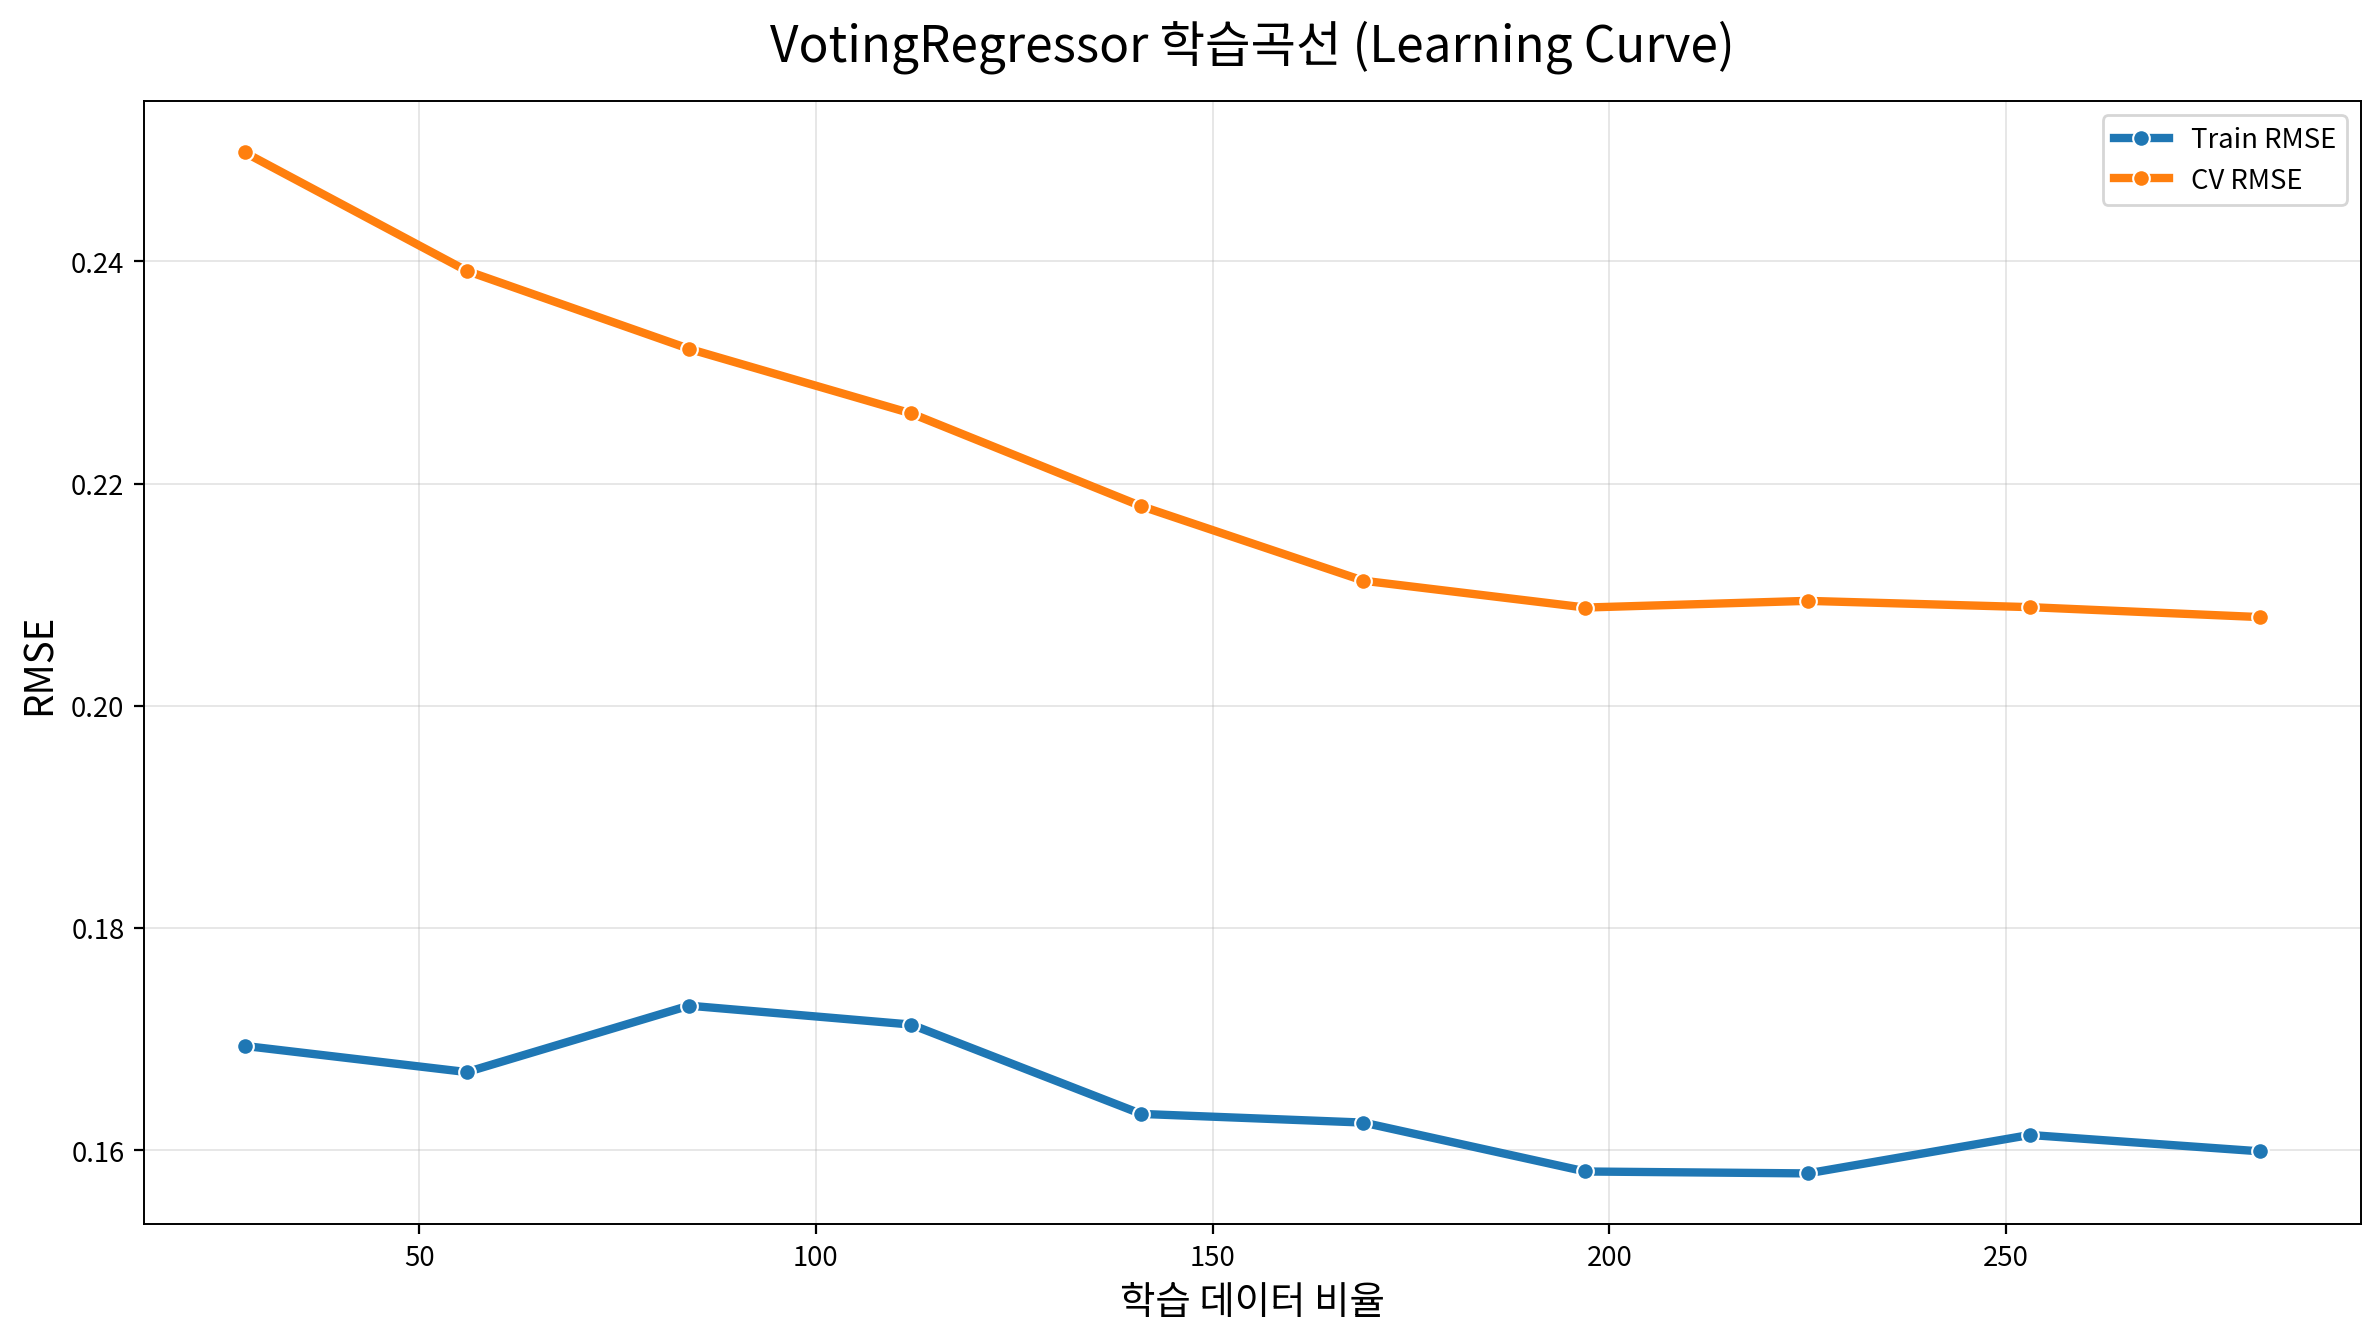

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE),Train RMSE,CV RMSE 평균,CV RMSE 표준편차,Train/CV 비율,CV 변동성 비율,판정 결과
VotingRegressor,0.694,0.157,0.044,0.209,0.010,0.282,0.160,0.208,0.013,0.769,0.062,⚠️ 과대적합


In [13]:
hs_get_score_cv(
    tuned, x_test_transformed, y_test_transformed, x_transformed, y_transformed
)

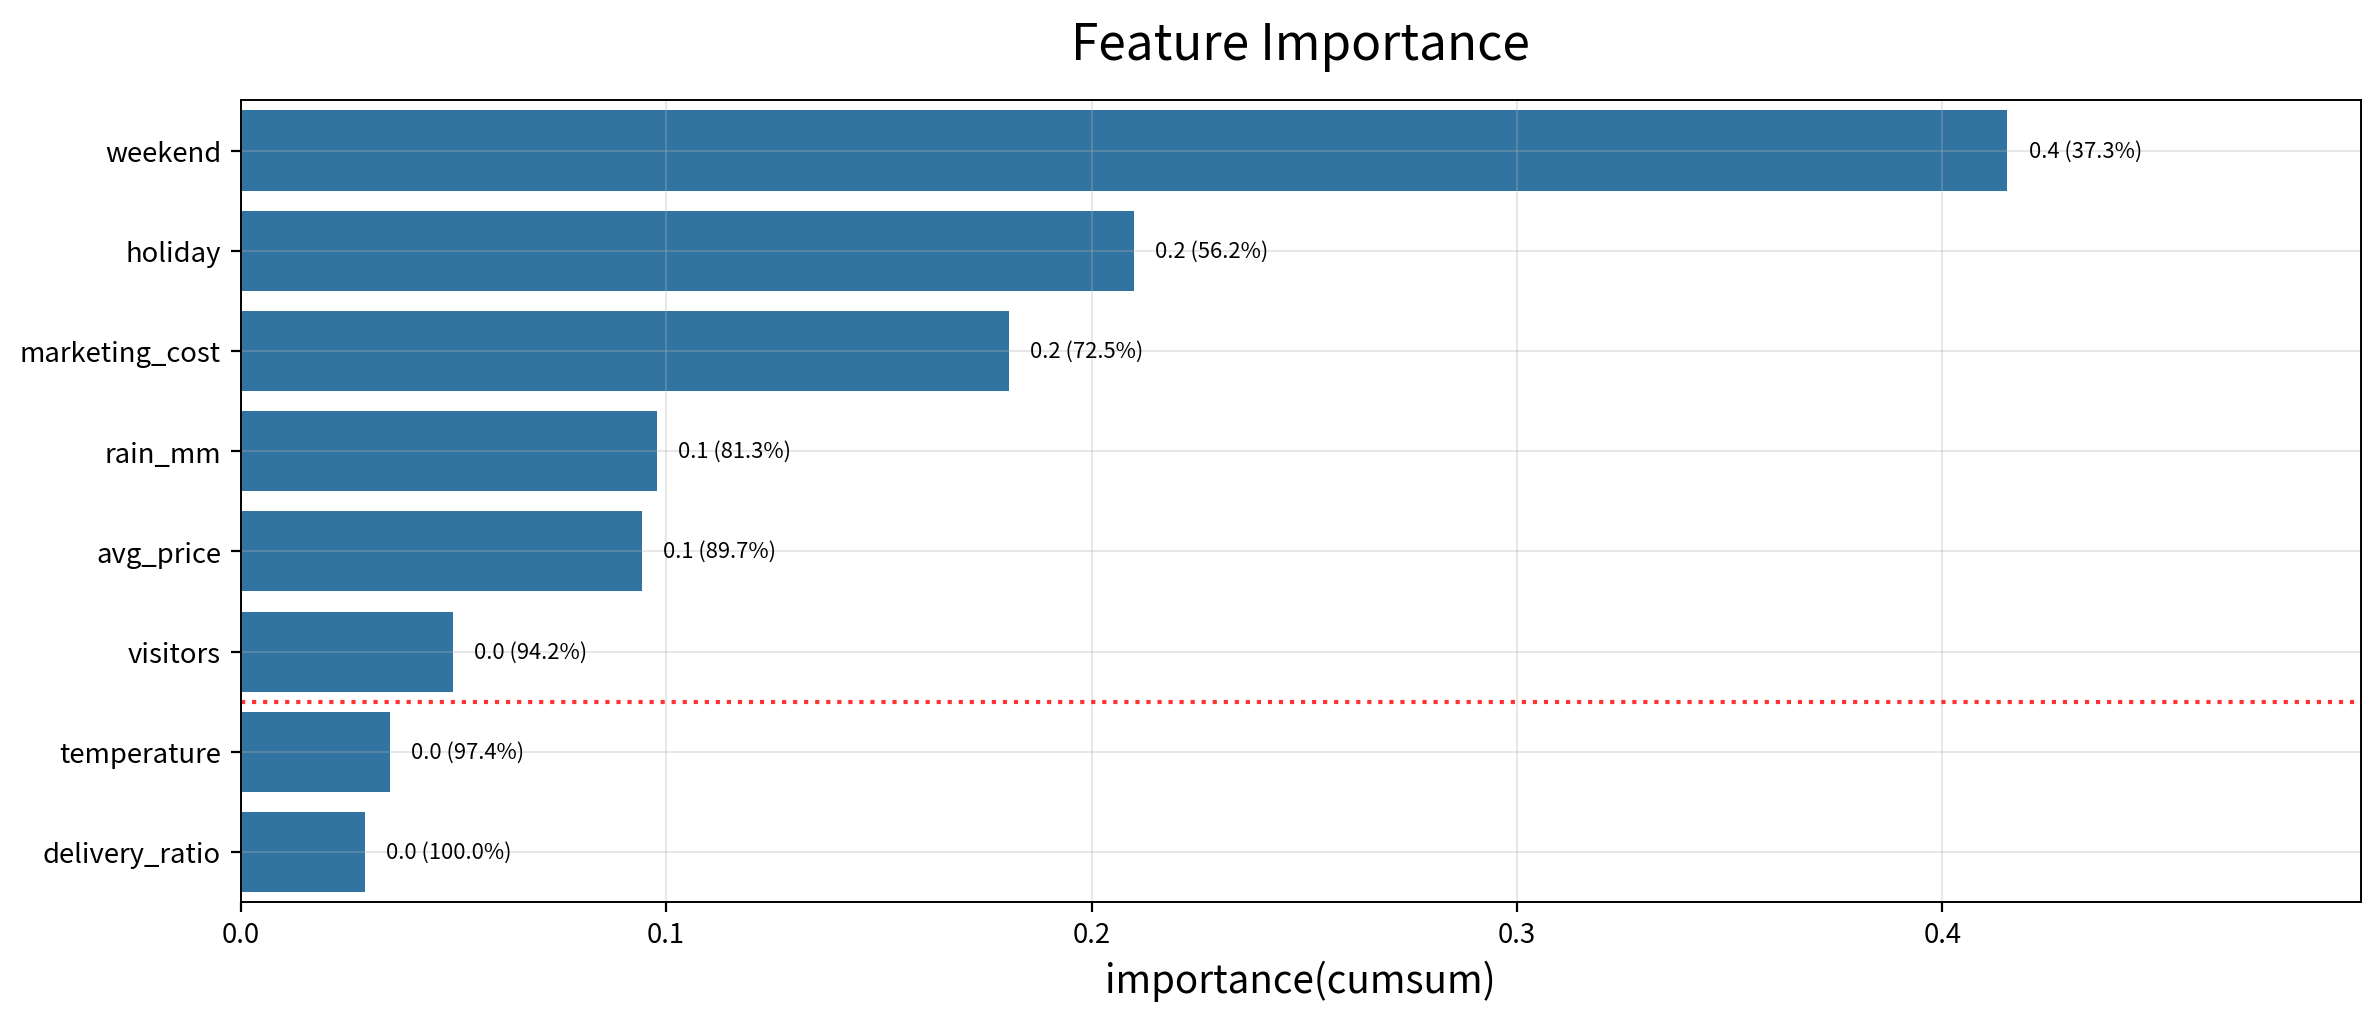

,importance,ratio,cumsum
weekend,0.415,0.373,0.373
holiday,0.210,0.189,0.562
marketing_cost,0.181,0.162,0.725
rain_mm,0.098,0.088,0.813
avg_price,0.094,0.085,0.897
visitors,0.050,0.045,0.942
temperature,0.035,0.031,0.974
delivery_ratio,0.029,0.026,1.000


In [14]:
hs_feature_importance(tuned, x_train_transformed, y_train_transformed)